In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

2025-11-26 10:04:14.273584: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-26 10:04:14.273836: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-26 10:04:14.308030: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-26 10:04:15.399361: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [5]:
X_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
X_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

Text(0.5, 1.0, 'Label: 5')

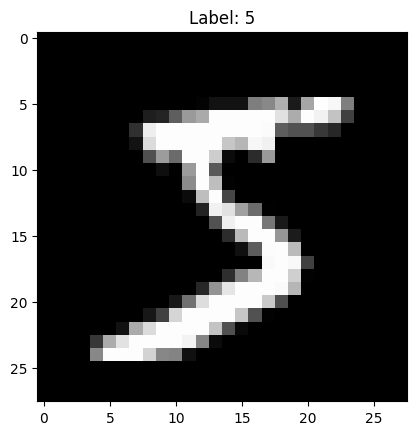

In [6]:
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title(f'Label: {y_train[0]}')

In [7]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/home/petpooja-1009/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-26 10:04:16.572750: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1, batch_size=64)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9341 - loss: 0.2845 - val_accuracy: 0.9818 - val_loss: 0.0631
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9800 - loss: 0.0654 - val_accuracy: 0.9830 - val_loss: 0.0609
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9863 - loss: 0.0428 - val_accuracy: 0.9882 - val_loss: 0.0442
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9877 - loss: 0.0390 - val_accuracy: 0.9878 - val_loss: 0.0455
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9907 - loss: 0.0294 - val_accuracy: 0.9872 - val_loss: 0.0446


In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", test_acc)

Test Accuracy: 0.9865000247955322


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted: 3


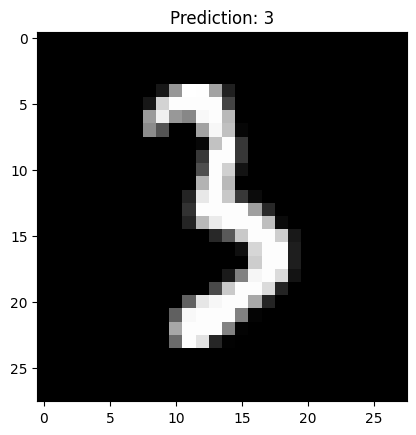

In [14]:
prediction = model.predict(x_test[44].reshape(1,28,28,1))
print("Predicted:", prediction.argmax())

plt.imshow(x_test[44].reshape(28,28), cmap='gray')
plt.title(f"Prediction: {prediction.argmax()}")
plt.show()